## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/hadi/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Read CSV Data

In [2]:
df = pd.read_csv('housePrice.csv')
df['Area'] = pd.to_numeric(df['Area'].str.replace(',', ''), errors='coerce')
print(f"Number of rows: {df.shape[0]}")
print(df.describe())
df.head()

Number of rows: 3479
               Area         Room         Price    Price(USD)
count  3.479000e+03  3479.000000  3.479000e+03  3.479000e+03
mean   8.744000e+06     2.079908  5.359023e+09  1.786341e+05
std    3.167266e+08     0.758275  8.099935e+09  2.699978e+05
min    3.000000e+01     0.000000  3.600000e+06  1.200000e+02
25%    6.900000e+01     2.000000  1.418250e+09  4.727500e+04
50%    9.000000e+01     2.000000  2.900000e+09  9.666667e+04
75%    1.200000e+02     2.000000  6.000000e+09  2.000000e+05
max    1.616000e+10     5.000000  9.240000e+10  3.080000e+06


,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


## Clean Data

### Handle outlier prices

In [3]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the Price column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for normal price values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cdf = df.copy()
# Create a new column to flag outliers
cdf['Price_Outlier'] = ((cdf['Price'] < lower_bound) | (cdf['Price'] > upper_bound))

# Remove the outliers from the original data
cdf = cdf[~cdf['Price_Outlier']]

# Drop the 'Price_Outlier' column if you no longer need it
cdf = cdf.drop(columns=['Price_Outlier'])
print(f"Number of rows after removing outliers: {cdf.shape[0]}")

Number of rows after removing outliers: 3169


### Remove Unknown Addresses

In [4]:
# Remove rows with missing addresses
cdf = cdf.dropna(subset=['Address'])
print(f"Number of rows after removing Unknown addresses: {cdf.shape[0]}")

Number of rows after removing Unknown addresses: 3146


### Clean Area

In [5]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the Area column
Q1 = cdf['Area'].quantile(0.25)
Q3 = cdf['Area'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds for normal price values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a new column to flag outliers
cdf['Area_Outlier'] = ((cdf['Area'] < lower_bound) | (cdf['Area'] > upper_bound))

# Remove the outliers from the original data
cdf = cdf[~cdf['Area_Outlier']]

# Drop the 'Area_Outlier' column if you no longer need it
cdf = cdf.drop(columns=['Area_Outlier'])
print(f"Number of rows after removing outliers: {cdf.shape[0]}")

Number of rows after removing outliers: 3057


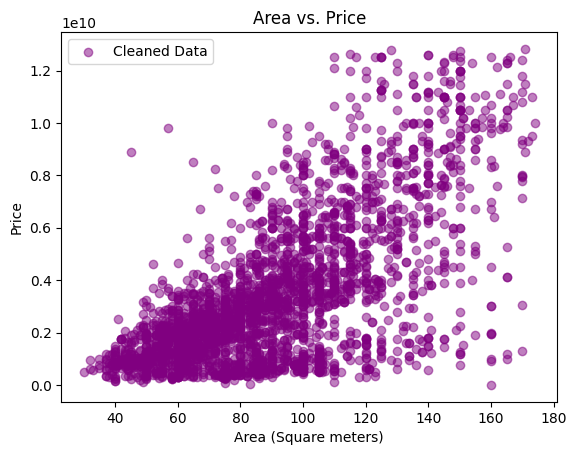

In [6]:
plt.scatter(cdf['Area'], cdf['Price'], color='purple', label='Cleaned Data', alpha=0.5)

# Add labels and title
plt.xlabel('Area (Square meters)')
plt.ylabel('Price')
plt.title('Area vs. Price')

# Add a legend
plt.legend()

plt.show()

### One Hot Encoding Address

In [7]:
print('Unique Adresses count is: ', len(cdf['Address'].unique()))
cdf['Address'].unique()

Unique Adresses count is:  187


array(['Shahran', 'Pardis', 'Shahrake Qods', 'Shahrake Gharb',
       'North Program Organization', 'Andisheh', 'West Ferdows Boulevard',
       'Narmak', 'Saadat Abad', 'Zafar', 'Islamshahr', 'Pirouzi',
       'Shahrake Shahid Bagheri', 'Moniriyeh', 'Amirieh',
       'Southern Janatabad', 'Salsabil', 'Zargandeh', 'Feiz Garden',
       'Water Organization', 'ShahrAra', 'Gisha', 'Ray', 'Abbasabad',
       'Ostad Moein', 'Farmanieh', 'Parand', 'Punak', 'Qasr-od-Dasht',
       'Aqdasieh', 'Railway', 'Central Janatabad',
       'East Ferdows Boulevard', 'Pakdasht KhatunAbad', 'Sattarkhan',
       'Shahryar', 'Northern Janatabad', 'Daryan No',
       'Southern Program Organization', 'Rudhen', 'West Pars', 'Afsarieh',
       'Marzdaran', 'Sadeghieh', 'Chahardangeh', 'Pakdasht', 'Baqershahr',
       'Jeyhoon', 'Lavizan', 'Shams Abad', 'Fatemi',
       'Keshavarz Boulevard', 'Baghestan', 'Kahrizak', 'Qarchak',
       'Northren Jamalzadeh', 'Azarbaijan', 'Bahar',
       'Persian Gulf Martyrs La

In [8]:
cdf_dummies = pd.get_dummies(cdf['Address'])
cdf_dummies

,Abazar,Abbasabad,Abuzar,Afsarieh,Ahang,Air force,Ajudaniye,Alborz Complex,Aliabad South,Amir Bahador,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3475,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3477,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
cdf = pd.concat([cdf, cdf_dummies], axis=1)
cdf

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Abazar,Abbasabad,...,Waterfall,West Ferdows Boulevard,West Pars,Yaftabad,Yakhchiabad,Yousef Abad,Zafar,Zaferanieh,Zargandeh,Zibadasht
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67,False,False,...,False,False,False,False,False,False,False,False,False,False
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67,False,False,...,False,False,False,False,False,False,False,False,False,False
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33,False,False,...,False,False,False,False,False,False,False,False,False,False
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,False,False,...,False,False,False,False,False,False,False,False,False,False
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67,False,False,...,False,False,False,False,False,False,False,False,False,False
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67,False,False,...,False,False,False,False,False,False,False,False,False,False
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67,False,False,...,False,False,False,False,False,False,False,False,False,False
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67,False,False,...,False,False,False,False,False,False,False,False,False,False


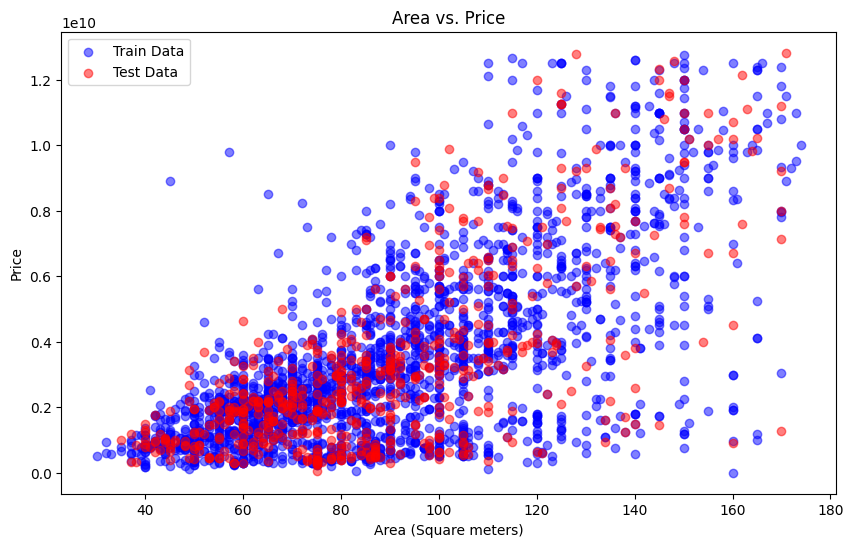

In [10]:
msk = np.random.rand(len(cdf)) < 0.80
train = cdf[msk]
test = cdf[~msk]

plt.figure(figsize=(10,6))  # Adjust the figure size for better visibility
plt.scatter(train['Area'], train['Price'], color='blue', label='Train Data', alpha=0.5)
plt.scatter(test['Area'], test['Price'], color='red', label='Test Data', alpha=0.5)


# Add labels and title
plt.xlabel('Area (Square meters)')
plt.ylabel('Price')
plt.title('Area vs. Price')

# Add a legend to differentiate between the datasets
plt.legend()

plt.show()

In [11]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
x_train = np.asanyarray(train.drop(['Price', 'Address', 'Price(USD)'], axis=1))
y_train = np.asanyarray(train[['Price']])

regr.fit (x_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[ 4.56509419e+07 -1.17251334e+08  1.73732593e+07 -1.80225246e+08
   1.16224538e+08  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.64049836e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19 -1.15285106e+16  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993e+19
   5.26969993e+19  5.26969993e+19  5.26969993e+19  5.26969993

In [12]:
# Prepare testing data
x_test = np.asanyarray(test.drop(['Price', 'Address', 'Price(USD)'], axis=1))
y_test = np.asanyarray(test[['Price']])

# Make predictions
y_hat = regr.predict(x_test)

# Calculate and print the explained variance score
print('Variance score: %.2f' % regr.score(x_test, y_test))

Variance score: -4541761923835251200.00


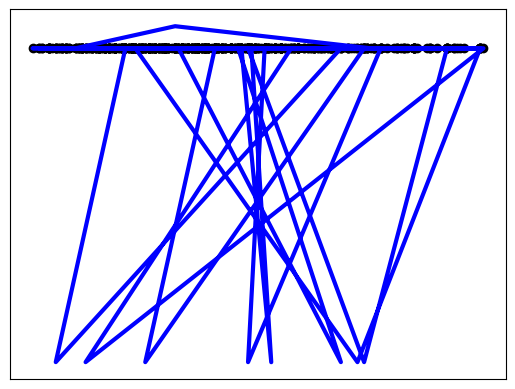

In [13]:
# Plot outputs
plt.scatter(test.Area, test.Price, color="black")
plt.plot(test['Area'], y_hat, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()